In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import norm,skew

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [4]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,61,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,158000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
757,758,60,RL,NaN,11616,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,4,2010,WD,Abnorml,158900
448,449,50,RM,50.0,8600,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,119500
1244,1245,70,RL,NaN,11435,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,230000


In [5]:
test.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
264,1725,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
1175,2636,60,RL,81.0,10530,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal
900,2361,20,RL,84.0,7476,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
79,1540,190,RM,100.0,9045,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
77,1538,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Abnorml


In [6]:
print("train size before dropping the Id feature is: {}".format(train.shape))
print("test size before dropping the Id feature is: {}".format(test.shape))

train size before dropping the Id feature is: (1460, 81)
test size before dropping the Id feature is: (1459, 80)


In [7]:
 # save the id column
train_Id=train['Id']
test_Id=test['Id']

# now drop it as it will be useless for training
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [8]:
print("train size after dropping the Id feature is {}".format(train.shape))
print("test size after dropping the Id feature is {}".format(test.shape))

train size after dropping the Id feature is (1460, 80)
test size after dropping the Id feature is (1459, 79)


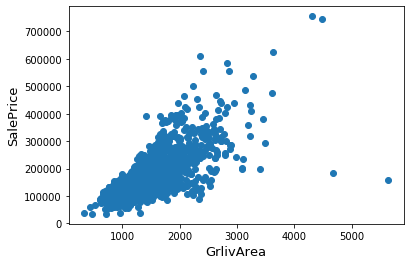

In [10]:
# let us check for utliers

fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrlivArea',fontsize=13)
plt.show()

In [11]:
# We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

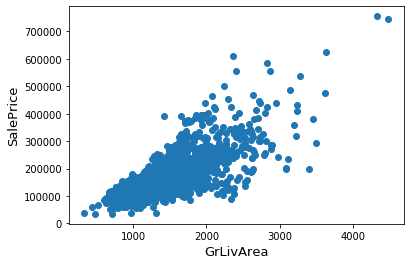

In [12]:
# check the graph again
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()


 mu= 180932.92 and sigma= 79467.79



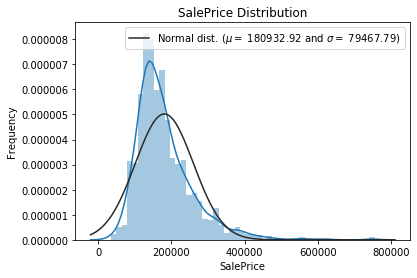

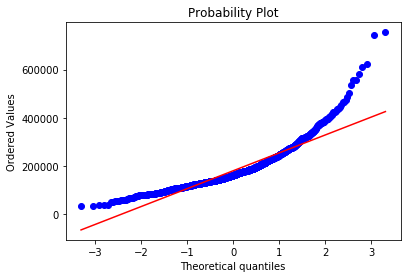

In [13]:
# SalePrice is out target variable, hence let us first analyse it
sns.distplot(train['SalePrice'],fit=norm)

# get the fitted params used by the fn
(mu,sigma)=norm.fit(train['SalePrice'])
print("\n mu= {:.2f} and sigma= {:.2f}\n".format(mu,sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc="best")
plt.ylabel("Frequency")
plt.title("SalePrice Distribution")

# get also the QQ-plot
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()


 mu=2.57 and sigma=0.03



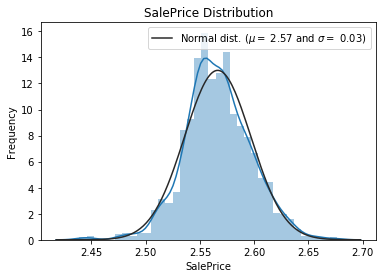

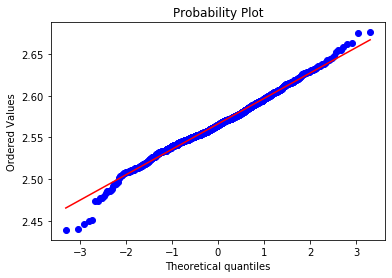

In [15]:
# the target var is right skewed, so we need to transform it to make it more normally distributed
# log transformation of the target variable

train['SalePrice']=np.log1p(train['SalePrice'])

# check the new distribution
sns.distplot(train['SalePrice'],fit=norm)

# get the fitted params
(mu,sigma)=norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))

# plot the distribution
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)],loc="best")
plt.ylabel("Frequency")
plt.title("SalePrice Distribution")

# get the QQ-plot
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

# feature engineering

In [17]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print(f"All data shape {all_data.shape}")

All data shape (2917, 79)


In [18]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({"Missing ratio":all_data_na})
missing_data.head(20)

,Missing ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent of missing values by feature')

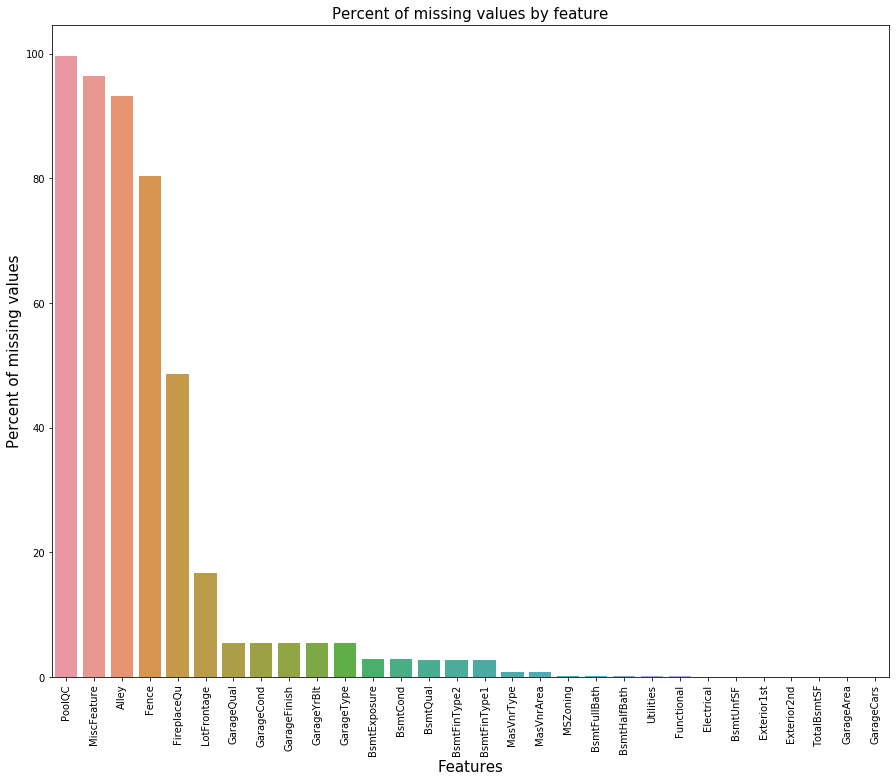

In [19]:
fig,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Percent of missing values",fontsize=15)
plt.title("Percent of missing values by feature",fontsize=15)

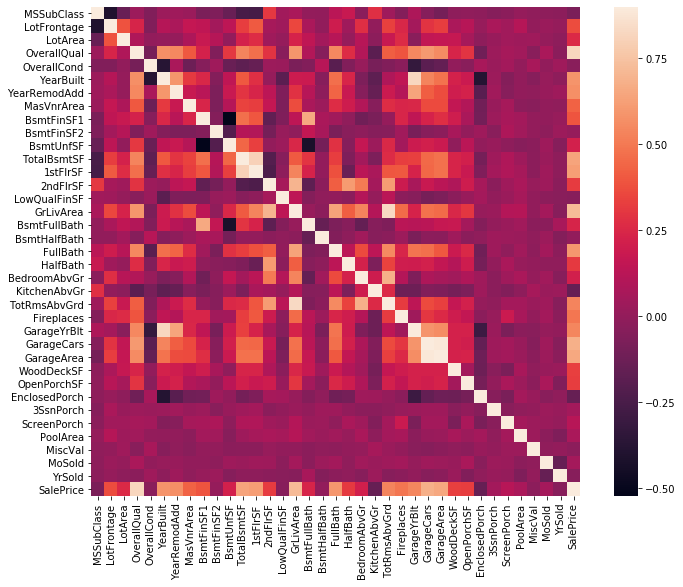

In [24]:
# correlation ,map to see how many values are correlated with SalePrice
corrmat=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)
plt.show()

## Imputing missing values

In [25]:
# PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
all_data['PoolQC']=all_data['PoolQC'].fillna("None")

In [26]:
# MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"]=all_data['MiscFeature'].fillna("None")

In [28]:
# Alley : data description says NA means "no alley access"
all_data["Alley"]=all_data["Alley"].fillna("None")

In [29]:
# Fence : data description says NA means "no fence"
all_data["Fence"]=all_data["Fence"].fillna("None")

In [30]:
# FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")

In [31]:
# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

# group by LotFrontage of all the neighborhood
all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [32]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col]=all_data[col].fillna("None")

In [33]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col]=all_data[col].fillna(0)